In [1]:
from part2_house_value_regression import Regressor
from sklearn import model_selection
import pandas as pd
import collections
import math
import random
from matplotlib import pyplot as plt

Generate first folds

In [3]:
output_label = "median_house_value"
data = pd.read_csv("housing.csv") 
x_train = data.loc[:, data.columns != output_label]
y_train = data.loc[:, [output_label]]
def genModel(hyperparam, x, y):
    xTrain, xValidation, yTrain, yValidation = model_selection.train_test_split(x, y, test_size=0.1)
    model = model_selection.GridSearchCV(
        estimator = Regressor(),
        param_grid = hyperparam,
        scoring="neg_root_mean_squared_error", #Scoring metric means lower is better
        cv=3,
        verbose=4,
        n_jobs=1,
        return_train_score = True
        )
    model.fit(xTrain, yTrain, xValidation=xValidation, yValidation=yValidation)
    print("model complete")
    return model
    
#This function will find the top two paramters and create a range between them
def getTopTwo(inputList):
    paramHeaders = {"nb_epoch" : 0, "learningRate" : 1, "neuronArchitecture" : 2, "batchSize" : 3}
    params = [[] for i in range(len(paramHeaders))]
    paramMode = dict()
    #Convert list of dictionaries to list per parameter
    for description in inputList:
        for key, value in description.items():
            params[paramHeaders[key]].append(tuple(value) if isinstance(value, list) else value)
    #Invert the dictionary
    paramInverted = {value: key for key, value in paramHeaders.items()}
    #Obtain the two most common items
    for index, value in enumerate(params):
        mode = collections.Counter(params[index]).most_common(2)
        paramMode[paramInverted[index]] = [i[0] for i in mode]
    return paramMode


In [20]:
hyperparam = {
        'nb_epoch': [300], 
        'learningRate': [0.14474875194908035, 0.08757384706489182, 0.654073592872426, 0.5453524780306971], 
        'neuronArchitecture': [[10, 9], [13, 10], [11, 8], [10, 7]], 
        'batchSize': [60, 73, 103, 85]
}
# hyperparam = {
#         "nb_epoch" : [300], 
#         "learningRate" : [0.001], 
#         "neuronArchitecture" : [[9,9,9]], 
#         "batchSize" : [256],
#         }
# # hyperparam = {
#         'nb_epoch': [150], 
#         'learningRate': [0.03859925930841978, 0.07261032139183789, 0.018281914050446196, 0.026122808062702445], 
#         'neuronArchitecture': [[11, 10], [10, 8], [12, 10], [10, 9]], 
#         'batchSize': [81, 61, 123, 88]
#         }
model = genModel(hyperparam, x_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-Reached epoch cycle: 39 with error: 64721.04838305171
[CV 1/3] END batchSize=60, learningRate=0.14474875194908035, nb_epoch=300, neuronArchitecture=[10, 9];, score=(train=-65872.582, test=-65762.583) total time=   8.9s
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-Reached epoch cycle: 49 with error: 64760.24694347551
[CV 2/3] END batchSize=60, learningRate=0.14474875194908035, nb_epoch=300, neuronArchitecture=[10, 9];, score=(train=-65632.605, test=-66753.007) total time=  11.2s
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-Reached epoch cycle: 42 with error: 64575.13843172254
[CV 3/3] END batchSize=60, learningRate=0.14474875194908035, nb_epoch=300, neuronArchi

In [21]:

results = pd.DataFrame(model.cv_results_)
print(results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       10.126148      0.935499         0.019929        0.000911   
1        7.367775      1.615171         0.018100        0.000937   
2       10.430044      2.841364         0.016627        0.001241   
3        9.398018      2.271847         0.017541        0.001850   
4       13.287344      2.104232         0.018755        0.001816   
..            ...           ...              ...             ...   
59       4.261058      1.109057         0.014886        0.000644   
60       5.644305      0.404207         0.017838        0.002718   
61       4.672596      0.166905         0.016462        0.001288   
62       4.685819      1.133024         0.016114        0.000134   
63       4.564258      0.215706         0.018019        0.000724   

   param_batchSize param_learningRate param_nb_epoch param_neuronArchitecture  \
0               60           0.144749            300                  [10, 9]   
1               60   

In [22]:
bestPerformer = results["mean_test_score"].max()
print(bestPerformer)
bestParams = model.best_params_
print(bestParams)

-65633.816006081
{'batchSize': 103, 'learningRate': 0.08757384706489182, 'nb_epoch': 300, 'neuronArchitecture': [10, 7]}


In [23]:
results.to_csv("hyperparamresults/finalres.csv", encoding='utf-8', index=False)
print(results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       10.126148      0.935499         0.019929        0.000911   
1        7.367775      1.615171         0.018100        0.000937   
2       10.430044      2.841364         0.016627        0.001241   
3        9.398018      2.271847         0.017541        0.001850   
4       13.287344      2.104232         0.018755        0.001816   
..            ...           ...              ...             ...   
59       4.261058      1.109057         0.014886        0.000644   
60       5.644305      0.404207         0.017838        0.002718   
61       4.672596      0.166905         0.016462        0.001288   
62       4.685819      1.133024         0.016114        0.000134   
63       4.564258      0.215706         0.018019        0.000724   

   param_batchSize param_learningRate param_nb_epoch param_neuronArchitecture  \
0               60           0.144749            300                  [10, 9]   
1               60   

In [8]:
candidateThreshold = 0.05
resultsTop = results.loc[results["mean_test_score"] >= bestPerformer*(1+candidateThreshold)]
#print(resultsTop)
paramList = resultsTop["params"].values
#Now, calculate all the new hyperparameters and prepare for next round
print("Found params:", paramList)

Found params: [{'batchSize': 64, 'learningRate': 0.01, 'nb_epoch': 300, 'neuronArchitecture': [9, 9]}
 {'batchSize': 64, 'learningRate': 0.01, 'nb_epoch': 300, 'neuronArchitecture': [9, 9, 9]}
 {'batchSize': 64, 'learningRate': 0.1, 'nb_epoch': 300, 'neuronArchitecture': [9]}
 {'batchSize': 64, 'learningRate': 0.1, 'nb_epoch': 300, 'neuronArchitecture': [9, 9]}
 {'batchSize': 64, 'learningRate': 0.1, 'nb_epoch': 300, 'neuronArchitecture': [9, 9, 9]}
 {'batchSize': 64, 'learningRate': 1, 'nb_epoch': 300, 'neuronArchitecture': [9]}
 {'batchSize': 64, 'learningRate': 1, 'nb_epoch': 300, 'neuronArchitecture': [9, 9]}
 {'batchSize': 128, 'learningRate': 0.01, 'nb_epoch': 300, 'neuronArchitecture': [9, 9]}
 {'batchSize': 128, 'learningRate': 0.01, 'nb_epoch': 300, 'neuronArchitecture': [9, 9, 9]}
 {'batchSize': 128, 'learningRate': 0.1, 'nb_epoch': 300, 'neuronArchitecture': [9, 9]}
 {'batchSize': 128, 'learningRate': 0.1, 'nb_epoch': 300, 'neuronArchitecture': [9, 9, 9]}
 {'batchSize': 128,

Search for best params

In [9]:
newParams = getTopTwo(paramList)
print("Optimum params:", newParams)

Optimum params: {'nb_epoch': [300], 'learningRate': [1, 0.1], 'neuronArchitecture': [(9, 9), (9, 9, 9)], 'batchSize': [64, 128]}


In [10]:
#Find magnitudes
#Determine the amount of layers - prefer less layers
layerCount = min([len(x) for x in newParams["neuronArchitecture"]])
#Determine the magnitude of the learning rate 
if len(newParams["learningRate"]) >= 2:
    learningMagnitude = sum([math.log(x, 10) for x in newParams["learningRate"][:2]])/2
else:
    learningMagnitude = math.log(newParams["learningRate"][0], 10)
print("Layercount:", layerCount, "Learning Magnitude:", learningMagnitude, "Learning rate approx:", 10**learningMagnitude)

Layercount: 2 Learning Magnitude: -0.4999999999999999 Learning rate approx: 0.316227766016838


In [19]:
newhyperparam = {"nb_epoch" : None, "learningRate" : None, "neuronArchitecture" : [], "batchSize" : None}
magnitudeModifier = 0.6
neuronModifier = 3
newhyperparam["learningRate"] = [10**random.uniform(learningMagnitude-magnitudeModifier, learningMagnitude+magnitudeModifier) for _ in range(4)]
#Neuron architecture
for i in range(4):
    maxNeurons = 13
    architecture = []
    for j in range(layerCount):
        #Ensure decreasing neurons
        maxNeurons = random.randint(maxNeurons-neuronModifier, maxNeurons)
        architecture.append(maxNeurons)
    newhyperparam["neuronArchitecture"].append(architecture)
#Batchsize
if len(newParams["batchSize"]) >= 2:
    batchMagnitude = sum([math.log(x, 2) for x in newParams["batchSize"][:2]])/2
else:
    batchMagnitude = math.log(newParams["batchSize"][0], 2)
newhyperparam["batchSize"] = [int(2**random.uniform(batchMagnitude-magnitudeModifier, batchMagnitude+magnitudeModifier)) for _ in range(4)]
newhyperparam["nb_epoch"] = newParams["nb_epoch"]
print("New hyperparameters:", newhyperparam)

New hyperparameters: {'nb_epoch': [300], 'learningRate': [0.14474875194908035, 0.08757384706489182, 0.654073592872426, 0.5453524780306971], 'neuronArchitecture': [[10, 9], [13, 10], [11, 8], [10, 7]], 'batchSize': [60, 73, 103, 85]}


Epoch graphs

In [15]:
xTrain, xValidation, yTrain, yValidation = model_selection.train_test_split(x_train, y_train, test_size=0.1)
epochCalc = Regressor(xTrain, nb_epoch=300, learningRate=0.1, neuronArchitecture=[9,9,9], batchSize=256, minImprovement=0.00005)
epochCalc.fit(xTrain, yTrain,  xValidation=xValidation, yValidation=yValidation, plotData=True)
epochData = epochCalc.epochData
#print(epochData)

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-100-101-102-103-104-105-106-107-108-109-110-111-112-113-114-115-116-117-118-119-120-121-122-123-124-125-126-127-128-129-130-131-132-133-134-135-136-137-138-139-140-141-142-143-144-145-146-147-148-149-150-151-152-153-154-155-156-157-158-159-160-161-162-163-164-165-166-167-168-169-170-171-172-173-174-175-176-177-178-179-180-181-182-183-184-185-186-187-188-189-190-191-192-193-194-195-196-197-198-199-200-201-202-203-204-205-206-207-208-209-210-211-212-213-214-215-216-217-218-219-220-221-222-223-224-225-226-227-228-229-230-231-232-233-234-235-236-237-238-239-240-241-242-243-244-245-246-247-248-249-250-251-252-253-254-255-256-257-258-259-260-261-262-263-264-265-266-267-268-269-270-271-272-273-274-275-276-27

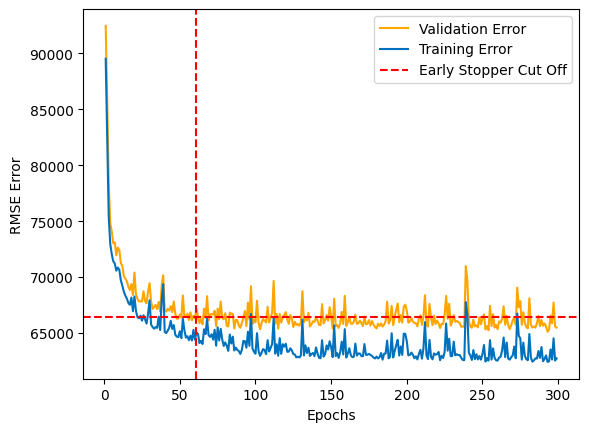

In [16]:
plt.plot(range(1, 300), epochData[1], label='Validation Error', color='orange')
plt.plot(range(1, 300), epochData[2], label='Training Error', color='#0072BD')
cutoffEpoch = 61
plt.axvline(cutoffEpoch, linestyle='--', color='red', label="Early Stopper Cut Off")
plt.axhline(epochData[1][cutoffEpoch], linestyle='--', color='red')
plt.xlabel("Epochs")
plt.ylabel("RMSE Error")
plt.legend()

In [39]:
blah = Regressor(x_train)
blah.fit(x_train, y_train)

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-

KeyboardInterrupt: 